In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit.from_qasm_file("sample.qasm")
print(qc.draw())

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


Quantum Circuit (without measurement):
      ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Full Statevector:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Number of Qubits: 2

Qubit 0 Bloch vector: [0.0, 0.0, 2.220446049250313e-16]


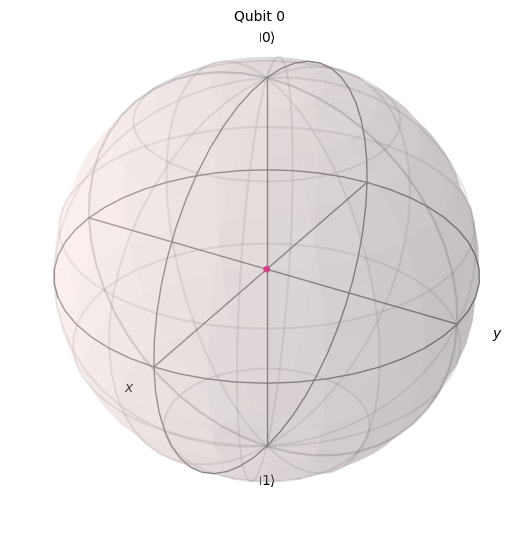


Qubit 1 Bloch vector: [0.0, 0.0, 2.220446049250313e-16]


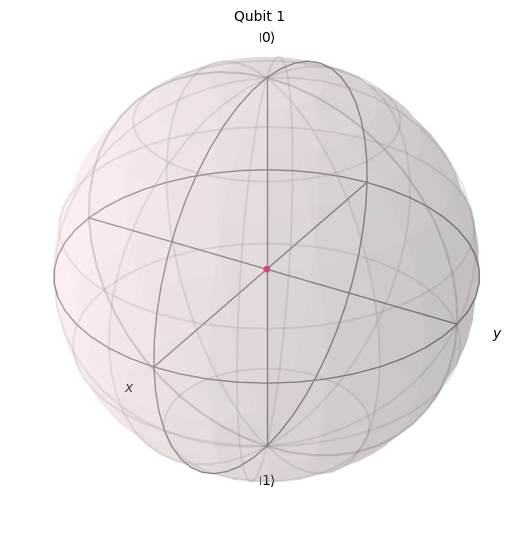

In [2]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import partial_trace, DensityMatrix, Pauli
from qiskit.visualization import plot_bloch_vector
import numpy as np
from IPython.display import display

def visualize_bloch_spheres_from_qasm(qasm_file):
    qc = QuantumCircuit.from_qasm_file(qasm_file)

    # Remove measurements, because they collapse the state
    qc.remove_final_measurements()
    
    print("Quantum Circuit (without measurement):\n", qc.draw())

    sim = Aer.get_backend("statevector_simulator")
    transpiled = transpile(qc, sim)
    result = sim.run(transpiled).result()

    statevector = result.get_statevector()
    print("\nFull Statevector:\n", statevector)

    dm = DensityMatrix(statevector)

    num_qubits = qc.num_qubits
    print(f"\nNumber of Qubits: {num_qubits}")

    for i in range(num_qubits):
        # Trace out all qubits except i
        reduced_dm = partial_trace(dm, [j for j in range(num_qubits) if j != i])

        # Compute Bloch vector
        bloch_vec = [
            np.real(reduced_dm.expectation_value(Pauli("X"))),
            np.real(reduced_dm.expectation_value(Pauli("Y"))),
            np.real(reduced_dm.expectation_value(Pauli("Z")))
        ]

        print(f"\nQubit {i} Bloch vector: {bloch_vec}")
        fig = plot_bloch_vector(bloch_vec, title=f"Qubit {i}")
        display(fig)

# Run the function
visualize_bloch_spheres_from_qasm("sample.qasm")
